# Overview of this Notebook

This notebook plots the feature images associated with a given subject, block, and trial on respective AOIs. It also plots the fixations per AoI associated with the features.

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [5]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as matplotlib
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy.io as io
import pandas as pd
from pandas import DataFrame, read_csv
from nivlink import Screen, Raw, Epochs, align_to_aoi, compute_fixations, plot_heatmaps
import cv2
import readline
from math import dist
from scipy.spatial.distance import squareform, pdist

import warnings
from scipy.stats import kde
import nivlink
import ipywidgets as wdg
from scipy.stats import iqr
print('Powered by NivLink' + str(nivlink.__version__))

Powered by NivLink0.2.5


In [1]:
# import custom functions
import plotAOIFeatures as paf
import plotAOIFixations as pafix
import analysisHelperFunctions as ahf
import mapAOIFixations as maf

In [7]:
## Define global variables ##
et_data_dir = os.getcwd() + '/ProcessedData/'# this expects ProcessedData to be in the analysis repo
image_dir = os.getcwd().strip('ldm-analysis') + 'FinalStimuli/ByNumber/'
raw_data_dir = os.getcwd().strip('ldm-analysis') + 'RawData/' # this expects RawData to be one directory up from the analysis repo

## Define screen metadata.
xdim, ydim, n_screens = 1280, 1024, 1 
aoisidelength = 162
n_aois = 9

# Define list with all subject ids; remove 33, 66, and 58 for ec and preproc troubles
good_subjects =  [23, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 
                 55, 57, 60, 61, 62, 63, 67, 68, 69, 70, 71];

In [8]:
subj_id = 45
block = 10
trial = 1
n_trials_block = 40
## Load data.
data, raw_pos_data, messages, sfreq = ahf.load_subj_data(subj_id)

## Load all centers.
all_centers = pd.read_csv(os.getcwd() + '/allCenters.csv')

## Subset this participant's centers. 
sub = 'Sub' + str(subj_id) + '_'
centers = all_centers[all_centers['Unnamed: 0'].str.contains(sub)]
centers['Block'] = [int(s.replace(sub + 'block' + '_', "")) for s in list(centers['Unnamed: 0'].values)]

## Mark run onsets. 
run_onsets = ahf.get_run_onsets(messages)
n_blocks, d = run_onsets.shape
print(n_blocks)
# Load feature map
featmap_file_path = et_data_dir + str(subj_id) + 'featmap.mat'
featmap_mat = io.loadmat(featmap_file_path, struct_as_record=False, squeeze_me=True)
featmap = np.array(featmap_mat["features_aoi_map"])

# Re-format events dataframe. 
events_df = ahf.rereference_events(subj_id, n_blocks, run_onsets, sfreq)

# Load fixations for sub
fixations = pd.read_csv(et_data_dir + str(subj_id) + 'fixations.csv')

10


/var/folders/wg/m30l6kjs09l1pxs4fshqx1xxjyhc2c/T/ipykernel_4153/276178501.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['Block'] = [int(s.replace(sub + 'block' + '_', "")) for s in list(centers['Unnamed: 0'].values)]


/Users/Naiti/Documents/Documents_NBMacBookPro/NYU/EyetrackingProject/ldm-analysis/plotAOIFeatures.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['Block'] = [int(s.replace(sub + 'block' + '_', "")) for s in list(centers['Unnamed: 0'].values)]


(<Figure size 270x216 with 2 Axes>, <AxesSubplot:>)

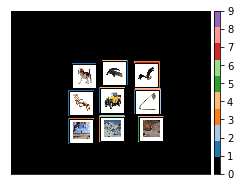

In [47]:
paf.plotAOIFeatures(39, 10, 7)

      Unnamed: 0  Trial   AoI  Onset  Offset  Duration  Feature  Block
5753         120  367.0   2.0  0.000   0.224     0.224      7.0     10
5754         122  367.0   5.0  0.232   0.480     0.248      9.0     10
5755         123  367.0  10.0  0.484   0.488     0.004     10.0     10
5756         124  367.0   9.0  0.492   0.796     0.304      5.0     10
5757         125  367.0  10.0  0.800   0.804     0.004     10.0     10
5758         126  367.0   6.0  0.808   0.812     0.004      6.0     10
5759         127  367.0  10.0  0.816   0.976     0.160     10.0     10
5760         128  367.0   5.0  0.980   1.084     0.104      9.0     10
5761         129  367.0  10.0  1.088   1.096     0.008     10.0     10
5762         130  367.0   9.0  1.100   1.812     0.712      5.0     10
5763         131  367.0  10.0  1.816   1.832     0.016     10.0     10
5764         132  367.0   9.0  1.836   1.864     0.028      5.0     10
5765         133  367.0  10.0  1.868   2.192     0.324     10.0     10
5766  

/Users/Naiti/Documents/Documents_NBMacBookPro/NYU/EyetrackingProject/ldm-analysis/plotAOIFixations.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['Block'] = [int(s.replace(sub + 'block' + '_', "")) for s in list(centers['Unnamed: 0'].values)]


(<Figure size 270x216 with 2 Axes>, <AxesSubplot:>)

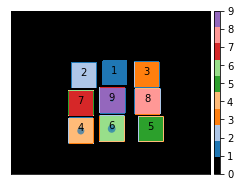

In [46]:
pafix.plotAOIFixations(39,10,7)

# Plot Looking Time Visualization

In [8]:
looking_time_df = {}
for subj_id in good_subjects:
    fixations = pd.read_csv(et_data_dir + str(subj_id) + 'fixations.csv')
    duration_summary = fixations.groupby(['Trial', 'Block','Feature'])['Duration'].sum()
    looking_time_df['Sub' + str(subj_id)] = duration_summary
looking_time_df = pd.DataFrame(looking_time_df).fillna(0).reset_index()

In [11]:
looking_time_df = pd.wide_to_long(looking_time_df, 'Sub', i=['Trial', 'Block', 'Feature'], j="Subj").rename(columns={"Sub": "Duration"}).unstack(level='Feature').reset_index()

In [12]:
for index, row in looking_time_df.iterrows():
    total_looking_time = row.Duration.sum()
    looking_time_df.loc[index, 'TotalLookingTime'] = total_looking_time
looking_time_df.columns = looking_time_df.columns.to_flat_index()
looking_time_df = looking_time_df.rename(columns={('Duration',  1.0): 'Feature1',('Duration',  2.0): 'Feature2', ('Duration',  3.0): 'Feature3',
                        ('Duration',  4.0): 'Feature4',('Duration',  5.0): 'Feature5', ('Duration',  6.0): 'Feature6',
                        ('Duration',  7.0): 'Feature7',('Duration',  8.0): 'Feature8', ('Duration',  9.0): 'Feature9',
                        ('Duration',  10.0): 'Feature10', ('Trial', ''):'Trial', ('Block', ''):'Block',
                        ('Subj', ''):'Subj', ('TotalLookingTime', ''):'TotalLookingTime'})

In [13]:
looking_time_df

,Trial,Block,Subj,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,TotalLookingTime
0,1.0,1,23,0.224,0.904,0.000,0.000,0.568,0.000,1.688,0.028,0.000,0.364,3.776
1,1.0,1,26,0.000,0.000,0.196,0.000,0.208,0.228,2.260,0.000,0.260,0.420,3.572
2,1.0,1,27,0.000,0.000,1.320,0.000,0.028,0.000,0.000,0.000,2.200,0.236,3.784
3,1.0,1,28,1.432,0.000,0.000,0.000,0.268,0.000,0.000,0.264,1.068,0.784,3.816
4,1.0,1,29,0.196,0.000,0.080,0.008,0.156,0.232,1.600,0.000,0.900,0.100,3.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,400.0,10,67,0.400,0.684,0.988,1.260,0.000,0.024,0.000,0.000,0.000,0.564,3.920
13996,400.0,10,68,0.000,0.000,0.000,0.000,0.000,1.237,0.651,1.695,0.000,0.415,3.998
13997,400.0,10,69,0.000,0.000,0.000,0.000,0.000,0.332,0.368,0.716,2.516,0.032,3.964
13998,400.0,10,70,1.180,0.000,0.568,0.000,0.328,1.460,0.000,0.000,0.000,0.388,3.924


In [36]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plotLookingTime(subj_id,block,trial, height=3,ticks=False):
    ## Load data.
    data, raw_pos_data, messages, sfreq = ahf.load_subj_data(subj_id)

    ## Mark run onsets.
    run_onsets = ahf.get_run_onsets(messages)
    n_blocks, d = run_onsets.shape

    # Load feature map
    featmap_file_path = et_data_dir + str(subj_id) + 'featmap.mat'
    featmap_mat = io.loadmat(featmap_file_path, struct_as_record=False, squeeze_me=True)
    featmap = np.array(featmap_mat["features_aoi_map"])

    # Re-format events dataframe.
    events_df = ahf.rereference_events(subj_id, n_blocks, run_onsets, sfreq)

    # Subselect this block's events.
    this_block = events_df.loc[events_df['block'] == float(block)]
    this_block_idx = events_df.index[events_df['block'] == float(block)].values
    n_trials_block = this_block.shape[0]

    # Subselect featmap.
    this_block_featmap = featmap[this_block_idx,:]
    # Add "null" AoI.
    this_block_featmap = np.hstack((this_block_featmap, np.ones((this_block_featmap.shape[0],1)) * 10))
    n_trials_block = this_block.shape[0]
    # Subselect trial
    trial_idx = trial-1
    this_trial_featmap = this_block_featmap[trial_idx]

    ## Initialize indices and labels of plot.
    indices = np.zeros((xdim,ydim,n_screens))
    labels = ()

    ## Load all centers.
    all_centers = pd.read_csv(os.getcwd() + '/allCenters.csv')

    ## Subset this participant's centers.
    sub = 'Sub' + str(subj_id) + '_'
    centers = all_centers[all_centers['Unnamed: 0'].str.contains(sub)]
    centers['Block'] = [int(s.replace(sub + 'block' + '_', "")) for s in list(centers['Unnamed: 0'].values)]

    # Grab block centers.
    block_centers = centers[centers['Block'] == int(block)]
    for a in range(0, n_aois):
        col_names = ['aoi' + str(a) + '_x', 'aoi' + str(a) + '_y']
        this_aoi_centers = block_centers[col_names].iloc[0].values

        # make array underlying screen using indices array with a different color for each aoi
        isfrac = lambda v: True if v < 1 and v > 0 else False
        xmin, xmax = [int(xdim * x) if isfrac(x) else int(x) for x in [this_aoi_centers[0]-aoisidelength//2, this_aoi_centers[0]+aoisidelength//2]]
        ymin, ymax = [int(ydim * y) if isfrac(y) else int(y) for y in [this_aoi_centers[1]-aoisidelength//2, this_aoi_centers[1]+aoisidelength//2]]

        # set color equal to feature number
        feat_num = int(this_trial_featmap[a])
        indices[xmin:xmax,ymin:ymax,0] = feat_num

        # values, curr_indices = np.unique(indices, return_inverse=True)

        # if np.all(values): curr_indices += 1
        # indices = curr_indices.reshape(xdim, ydim, n_screens)
        labels = tuple(range(1,int(n_aois)+1))

    ## Initialize plot.
    ratio = float(xdim) / float(ydim)
    fig, ax = plt.subplots(1,1,figsize=(ratio*height, height))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)

    ## Initialize colormap.
    # Collect hex values from standard colormap.
    cmap = cm.get_cmap('tab20', 20)

    colors = []
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(matplotlib.colors.rgb2hex(rgb))

    colors = colors[:len(labels)]

    # Add black.
    if np.any(indices==0): colors = np.insert(colors, 0, 'k')

    # Construct new colormap.
    cmap = ListedColormap(colors)
    ## Plotting.
    cbar = ax.imshow(indices[:,:,-1].T, cmap=cmap, aspect='auto', vmin=0, vmax=len(labels))
    fig.colorbar(cbar, cax, ticks=np.arange(len(cmap.colors)))
    if not ticks: ax.set(xticks=[], yticks=[])

    for a in range(0, n_aois):
        col_names = ['aoi' + str(a) + '_x', 'aoi' + str(a) + '_y']
        this_aoi_centers = block_centers[col_names].iloc[0].values

        xy = (this_aoi_centers[0], this_aoi_centers[1])

        feat_num = int(this_trial_featmap[a])

        ax.annotate(str(feat_num), # this is the text
                    xy, # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,0), # distance from text to points (x,y)
                    ha='center')

        # grab fixations for this aoi
        this_looking_time = looking_time_df.loc[looking_time_df['Subj'] == subj_id]
        this_looking_time = this_looking_time.loc[this_looking_time['Block'] == block]
        this_looking_time = this_looking_time.loc[this_looking_time['Trial'] == ((block-1)*n_trials_block)+trial]
        feature_lookingtime = this_looking_time['Feature' + str(feat_num)].item()
        circle = plt.Circle(xy, feature_lookingtime*100, alpha=0.7)
        ax.add_patch(circle)
    return fig, ax

    

/var/folders/pt/mk_d2k8923lbq911vprvfth00000gn/T/ipykernel_4585/4271138694.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['Block'] = [int(s.replace(sub + 'block' + '_', "")) for s in list(centers['Unnamed: 0'].values)]


(<Figure size 270x216 with 2 Axes>, <AxesSubplot:>)

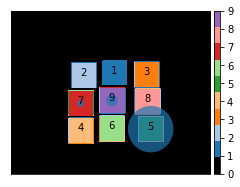

In [45]:
plotLookingTime(39,10,7)